<a href="https://colab.research.google.com/github/adudhe/Predictive-Analytics/blob/main/Final_project_python_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 7.2 MB/s 
     |████████████████████████████████| 9.8 MB 5.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LPGPRICES.csv to LPGPRICES.csv


In [ ]:
#Read the LPG Price dataset
LPGPrice_data = pd.read_csv("/content/LPGPRICES.csv")

In [ ]:
LPGPrice_data.head()

,Price
0,552.500000
1,552.570007
2,551.880005
3,551.880005
4,551.880005


In [ ]:
#Make sure there are no null values at the end of the dataset
LPGPrice_data.tail()

,Price
825,683.640015
826,685.820007
827,685.969971
828,692.270019
829,695.349976


In [ ]:
#Check the datatypes
LPGPrice_data.dtypes

Price    float64
dtype: object

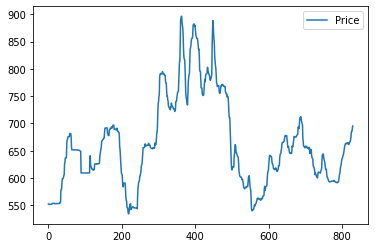

In [ ]:
# To understand the pattern
LPGPrice_data.plot()

In [ ]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(LPGPrice_data)

(0.3474969602235809, True)

In [ ]:
from pandas.core.indexes.base import Index

#Spliting the dataset into train and test
Price = LPGPrice_data[:85]
Price = LPGPrice_data[-20:]

In [ ]:
arima_model =  auto_arima(Price,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=45.156, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=46.763, Time=0.05 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=47.156, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=47.156, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=49.156, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=44.467, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=48.397, Time=0.40 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=46.455, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=44.826, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=44.763, Time=0.02 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=41.119, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   : AIC=43.119, Time=

In [ ]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   20
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -17.600
Date:                            Fri, 08 Jul 2022   AIC                             39.200
Time:                                    18:05:26   BIC                             39.092
Sample:                                         0   HQIC                            37.863
                                             - 20                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.3500      1.131      3.847      0.000       2.134       6.566
sigma2         8.9411      6.959      1.285      0.199      -4.697      22.580
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.72   Prob(JB):                         0.85
Heteroskedasticity (H):              11.59   Skew:                             0.03
Prob(H) (two-sided):                  0.16   Kurtosis:                         1.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=Price.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
810,699.480007
811,704.749991
812,710.890032
813,717.580000
814,722.140023
815,730.139988
816,738.130005
817,752.070033
818,758.600028
819,763.099993


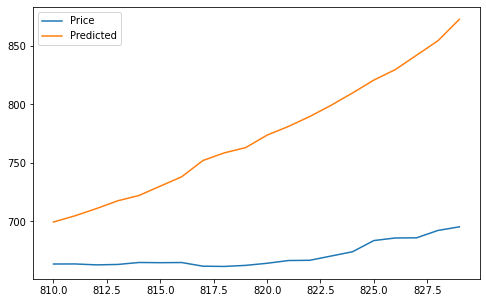

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(Price,label="Price")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

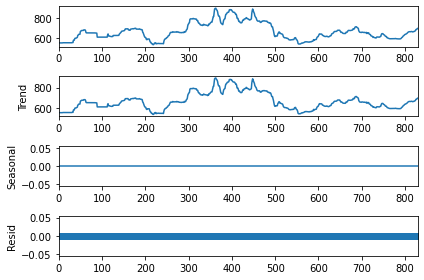

In [ ]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(LPGPrice_data, model = 'additive', period = 1)
result.plot()
pyplot.show()

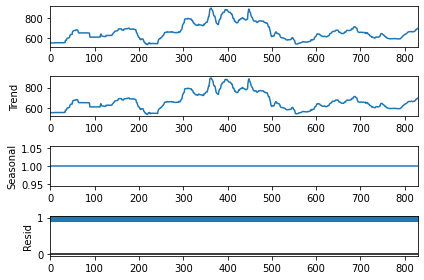

In [ ]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(LPGPrice_data, model = 'multiplicative', period = 1)
result.plot()
pyplot.show()

In [ ]:
#Exponential smoothing

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

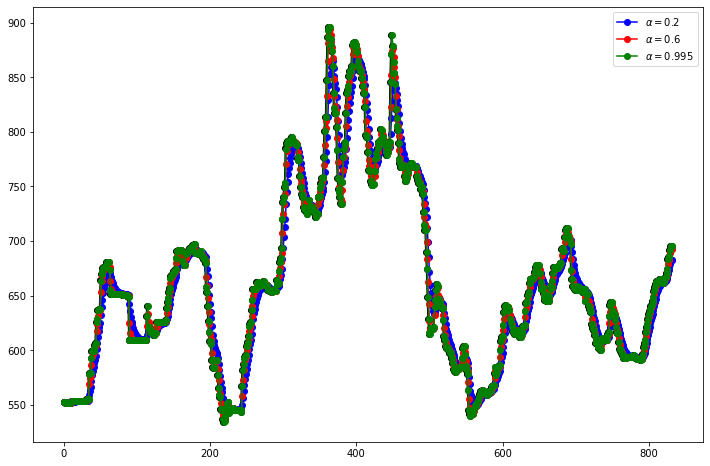

In [ ]:
#Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(LPGPrice_data, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(LPGPrice_data, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(LPGPrice_data, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(12, 8))
plt.plot(LPGPrice_data, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

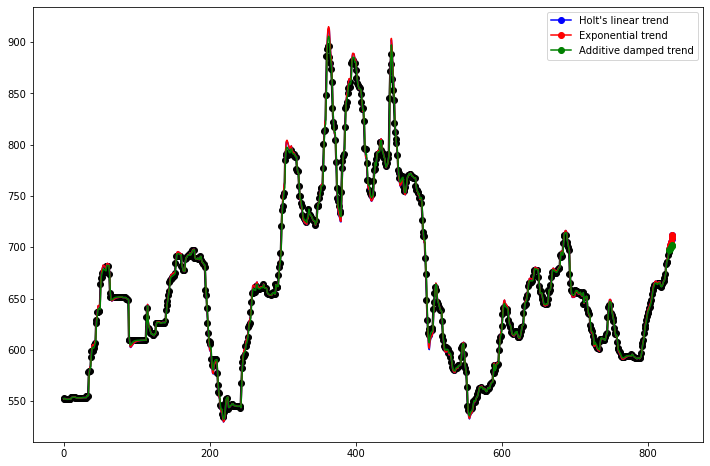

In [ ]:
#Holt’s Method
fit1 = Holt(LPGPrice_data, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(LPGPrice_data, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(LPGPrice_data, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(LPGPrice_data, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

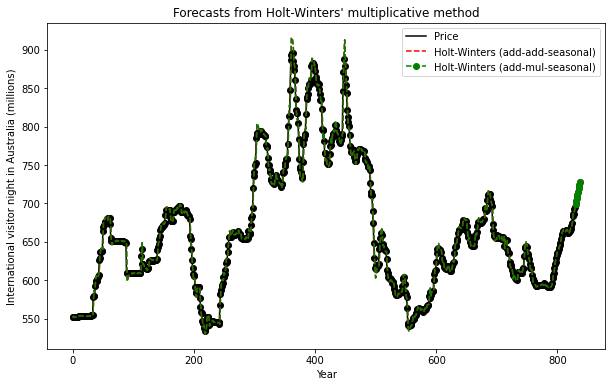

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,9.950000e-01,9.950000e-01,9.950000e-01,9.950000e-01
$\beta$,3.198214e-01,3.198214e-01,3.198214e-01,3.198214e-01
$\phi$,NaN,NaN,9.900000e-01,9.900000e-01
$\gamma$,5.000000e-03,5.000000e-03,5.000000e-03,5.000000e-03
$l_0$,5.150422e-01,5.150422e-01,5.150422e-01,5.150422e-01
$b_0$,1.258006e-09,1.258006e-09,1.258006e-09,1.258006e-09
SSE,3.405480e+04,3.405480e+04,3.363925e+04,3.363925e+04


In [ ]:
#Holt’s Winters Seasonal
fit1 = ExponentialSmoothing(
    LPGPrice_data,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit2 = ExponentialSmoothing(
    LPGPrice_data,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit3 = ExponentialSmoothing(
    LPGPrice_data,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit4 = ExponentialSmoothing(
    LPGPrice_data,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = LPGPrice_data.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style="--", color="red")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")

fit1.forecast(8).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
fit2.forecast(8).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)

plt.show()
print(
    "Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality."
)

results